---

# 0. Imports

---

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import utils

---

# 1. Importing data

---

In [21]:
path = "../data/Online_Retail.csv"
df = pd.read_csv(path, encoding="ISO-8859-1")

In [22]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


---

# 2. Data exploration

---

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [24]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [25]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [26]:
df.duplicated().sum()

5268

In [27]:
unique_values = {col: df[col].unique() for col in df.columns}

for col, values in unique_values.items():
    print(f"Unique values in column '{col}':")
    print(values[:10])
    print("--" * 50)

Unique values in column 'InvoiceNo':
['536365' '536366' '536367' '536368' '536369' '536370' '536371' '536372'
 '536373' '536374']
----------------------------------------------------------------------------------------------------
Unique values in column 'StockCode':
['85123A' '71053' '84406B' '84029G' '84029E' '22752' '21730' '22633'
 '22632' '84879']
----------------------------------------------------------------------------------------------------
Unique values in column 'Description':
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' 'KNITTED UNION FLAG HOT WATER BOTTLE'
 'RED WOOLLY HOTTIE WHITE HEART.' 'SET 7 BABUSHKA NESTING BOXES'
 'GLASS STAR FROSTED T-LIGHT HOLDER' 'HAND WARMER UNION JACK'
 'HAND WARMER RED POLKA DOT' 'ASSORTED COLOUR BIRD ORNAMENT']
----------------------------------------------------------------------------------------------------
Unique values in column 'Quantity':
[ 6  8  2 32  3  4 24 12 48 18]
---------------

---

# 3. Data cleaning

---

In [28]:
df_cleaned = df.drop_duplicates()
df_cleaned = df_cleaned.dropna(subset=['CustomerID'])

In [29]:
df_cleaned.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

---

# 4. New Features

---

In [30]:
df_cleaned["TotalAmount"] = df_cleaned["Quantity"] * df_cleaned["UnitPrice"]

df_cleaned["InvoiceDate"] = pd.to_datetime(df_cleaned["InvoiceDate"])

C:\Users\manue\AppData\Local\Temp\ipykernel_12040\200030330.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned["InvoiceDate"] = pd.to_datetime(df_cleaned["InvoiceDate"])


In [31]:
df_cleaned.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00


In [32]:
df_cleaned["Year"] = df_cleaned["InvoiceDate"].dt.year
df_cleaned["Month"] = df_cleaned["InvoiceDate"].dt.month
df_cleaned["Semester"] = df_cleaned["Month"].apply(lambda x: 1 if x <= 6 else 2)
df_cleaned["Trimester"] = df_cleaned["Month"].apply(lambda x: 1 if x <=4 else (2 if x <= 8 else 3))

df_cleaned.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month,Semester,Trimester
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,2010,12,2,3


In [33]:
sales_by_year = df_cleaned.groupby("Year")["TotalAmount"].sum()
sales_by_year.head(3)

Year
2010     552372.860
2011    7726146.564
Name: TotalAmount, dtype: float64

In [34]:
sales_by_semester = df_cleaned.groupby(["Year", "Semester"])["TotalAmount"].sum()
sales_by_semester

Year  Semester
2010  2            552372.860
2011  1           3166939.041
      2           4559207.523
Name: TotalAmount, dtype: float64

In [35]:
sales_by_trimester = df_cleaned.groupby(["Year", "Trimester"])["TotalAmount"].sum()
sales_by_trimester

Year  Trimester
2010  3             552372.860
2011  1            1913064.851
      2            2442064.601
      3            3371017.112
Name: TotalAmount, dtype: float64

In [36]:
sales_by_month = df_cleaned.groupby(["Year","Month"])["TotalAmount"].sum()
sales_by_month

Year  Month
2010  12        552372.860
2011  1         473731.900
      2         435534.070
      3         578576.210
      4         425222.671
      5         647011.670
      6         606862.520
      7         573112.321
      8         615078.090
      9         929356.232
      10        973306.380
      11       1126815.070
      12        341539.430
Name: TotalAmount, dtype: float64

In [37]:
total_returns = df_cleaned[df_cleaned["Quantity"] < 0].shape[0]
total_returns

8872

In [38]:
total_non_returns = df_cleaned[df_cleaned["Quantity"] >= 0].shape[0]
total_non_returns

392732

In [41]:
df_cleaned["AmountCategory"] = df_cleaned["TotalAmount"].apply(utils.categorize_total_amount)
df_cleaned.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month,Semester,Trimester,AmountCategory
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,2010,12,2,3,Low


In [46]:
total_amount_low = df_cleaned[df_cleaned["AmountCategory"] == "Low"].shape[0]
total_amount_medium = df_cleaned[df_cleaned["AmountCategory"] == "Medium"].shape[0]
total_amount_high = df_cleaned[df_cleaned["AmountCategory"] == "High"].shape[0]

In [73]:
top_products = df_cleaned.groupby("StockCode")["Quantity"].sum().sort_values(ascending=False).head(10)
top_products = top_products.reindex()
top_products = pd.merge(top_products, df_cleaned[["StockCode", "Description"]].drop_duplicates(), on="StockCode", how="left")
top_products

,StockCode,Quantity,Description
0,84077,53119,WORLD WAR 2 GLIDERS ASSTD DESIGNS
1,22197,48689,SMALL POPCORN HOLDER
2,22197,48689,POPCORN HOLDER
3,85099B,44963,JUMBO BAG RED RETROSPOT
4,84879,35215,ASSORTED COLOUR BIRD ORNAMENT
5,85123A,34185,WHITE HANGING HEART T-LIGHT HOLDER
6,85123A,34185,CREAM HANGING HEART T-LIGHT HOLDER
7,21212,33386,PACK OF 72 RETROSPOT CAKE CASES
8,23084,27045,RABBIT NIGHT LIGHT
9,22492,25880,MINI PAINT SET VINTAGE


---

# 4. Graficacion

---

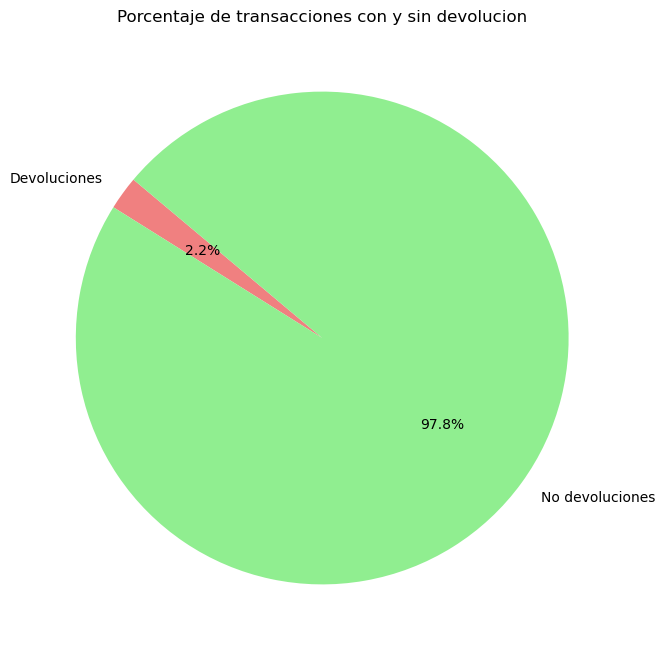

In [39]:
labels = ["Devoluciones", "No devoluciones"]
sized = [total_returns, total_non_returns]
colors = ["lightcoral","lightgreen"]

plt.figure(figsize=(8, 8))
plt.pie(sized, labels=labels, colors=colors, autopct="%1.1f%%", startangle=140)
plt.title("Porcentaje de transacciones con y sin devolucion")
plt.show()

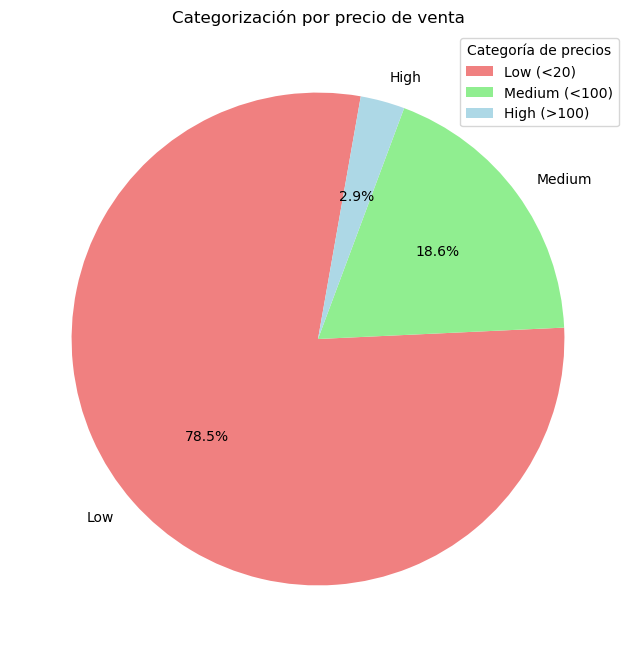

In [54]:
labels = ["Low", "Medium", "High"]
sized = [total_amount_low, total_amount_medium, total_amount_high]
colors = ["lightcoral", "lightgreen", "lightblue"]

plt.figure(figsize=(8, 8))
plt.pie(sized, labels=labels, colors=colors, autopct="%1.1f%%", startangle=80)

# Personalizar la leyenda con los rangos de valores
custom_labels = ["Low (<20)", "Medium (<100)", "High (>100)"]
plt.legend(custom_labels, title="Categoría de precios")

plt.title("Categorización por precio de venta")
plt.show()


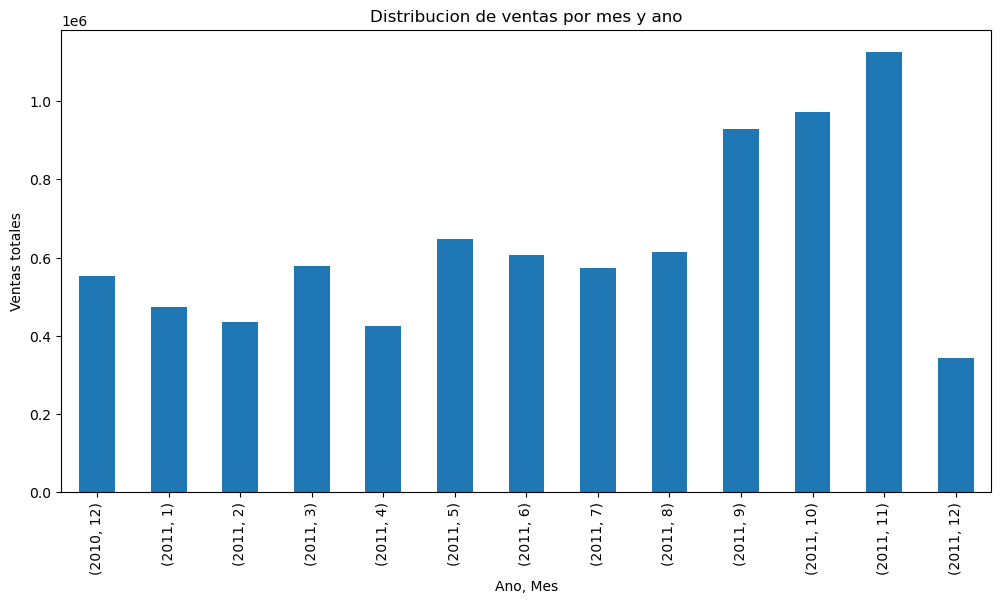

In [55]:
plt.figure(figsize=(12,6))

df_cleaned.groupby(["Year", "Month"])["TotalAmount"].sum().plot(kind="bar")
plt.title("Distribucion de ventas por mes y ano")
plt.xlabel("Ano, Mes")
plt.ylabel("Ventas totales")
plt.show()

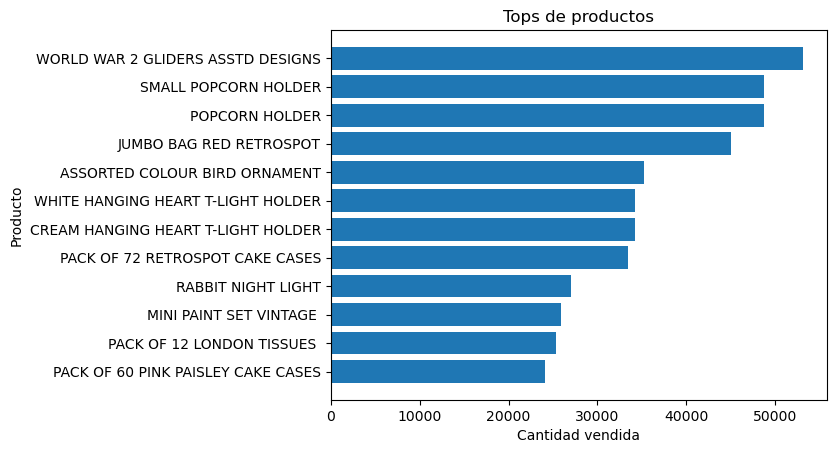

In [79]:
plt.Figure(figsize=(12,0))
plt.barh(top_products["Description"], top_products["Quantity"])
plt.title("Tops de productos")
plt.xlabel("Cantidad vendida")
plt.ylabel("Producto")
plt.gca().invert_yaxis()
plt.show()